# Debugging model
---

In [52]:
!pip install requests
!pip install tqdm
!pip install Pillow
!pip install matplotlib

In [53]:
import requests
import datetime
import os
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
from matplotlib import pyplot as plt


---
## Importing / Modifying the data

In [54]:
# We import all "all quiet on the western front" text from Project Gutenberg
url = "https://www.gutenberg.org/cache/epub/75011/pg75011.txt"
text = requests.get(url).text

with open("all_quiet_on_the_western_front.txt", "w", encoding="utf-8") as file:
    file.write(text)


In [55]:
print("The text is {} characters long.".format(len(text)))
print(f"Text: {text[:100]}...")

The text is 368551 characters long.
Text: ﻿The Project Gutenberg eBook of All quiet on the Western Front
    
This ebook is for the use of a...


In [56]:

with open("all_quiet_on_the_western_front.txt", "r", encoding="utf-8") as file:
    working_txt = file.read()
    # remove line breaks
    working_txt = working_txt.replace("\n", " ")
    # remove multiple spaces
    working_txt = " ".join(working_txt.split())
    

In [57]:
working_txt[:100]

'\ufeffThe Project Gutenberg eBook of All quiet on the Western Front This ebook is for the use of anyone a'

---
## Prepare Images
Create images of equal character length and put them into a directory.
By doing that we create images with an corresponding .txt-file. 

In [58]:
print("The text is {} characters long.".format(len(text)))

The text is 368551 characters long.


In [59]:
#insert a line break every X characters
def insert_line_breaks(text, line_length=15):
    return "\n".join(text[i:i + line_length] for i in range(0, len(text), line_length))

formatted_text = insert_line_breaks(working_txt, 15)
with open("formatted_all_quiet_on_the_western_front.txt", "w", encoding="utf-8") as file:
    file.write(formatted_text)
print("Formatted text saved to 'formatted_all_quiet_on_the_western_front.txt'.")
print(f"Content:\n{formatted_text[:100]}...")
print(f"number of rows: {formatted_text.count('\n') + 1}")


Formatted text saved to 'formatted_all_quiet_on_the_western_front.txt'.
Content:
﻿The Project Gu
tenberg eBook o
f All quiet on 
the Western Fro
nt This ebook i
s for the use o
f an...
number of rows: 23696


---
## Create the dataset

In [62]:
# Parameters
output_dir = "dataset"
font_path = "DejaVuSans-Bold.ttf"
font_size = 120
img_width = 1024
img_height = 256
text_color = "black"

# Read and clean lines from file
with open("formatted_all_quiet_on_the_western_front.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

font = ImageFont.truetype(font_path, font_size)

for idx, line in tqdm(enumerate(lines), total=len(lines), desc="Generating images"):
    # Create a new image
    img = Image.new('RGB', (img_width, img_height), color='white')
    draw = ImageDraw.Draw(img)

    # Get bounding box for text
    bbox = draw.textbbox((0, 0), line, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]

    # Calculate centered position
    x = (img_width - text_width) // 2
    y = (img_height - text_height) // 2

    # Draw centered text
    draw.text((x, y), line, font=font, fill=text_color)

    # Generate unique name
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_%f")
    base_name = f"{timestamp}_{idx}"

    # Save image and text
    img.save(os.path.join(output_dir, f"{base_name}.png"))
    with open(os.path.join(output_dir, f"{base_name}.txt"), "w", encoding="utf-8") as f:
        f.write(line)

    # Optional: comment this out if you want all lines processed
    #break  # Remove this line to process all lines


Generating images:   0%|          | 0/23696 [00:00<?, ?it/s]

Generating images: 100%|██████████| 23696/23696 [08:39<00:00, 45.58it/s]


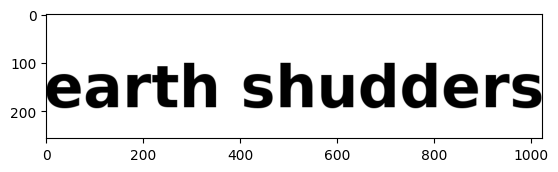

In [64]:
# Get the first .png file in the directory
png_files = [f for f in os.listdir(output_dir) if f.lower().endswith('.png')]
if not png_files:
    raise FileNotFoundError("No .png files found in the directory.")

first_image_path = os.path.join(output_dir, png_files[100])
first_image = Image.open(first_image_path)
plt.imshow(first_image)
plt.axis('on')  # Hide axes
plt.show()

